In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# whole set
#step = 0.001
#real_min, real_max = -1.5, 0.5
#imag_min, imag_max = -1., 1.

# detail, ratio 1:1 2500x2500
# defines the resolution of the resulting image
# same step for real and imaginary to avoid shrinking
step = 0.00004
real_min, real_max = -1.19, -1.09
imag_min, imag_max = 0.2, 0.3

# to keep the final coords
real_max += step
imag_max += step

real = np.arange(real_min, real_max, step)
imag = np.arange(imag_min, imag_max, step)
imag = imag * 1j
imag = imag[::-1]  # reverse order for plot

In [3]:
c = []
for im in imag:
    c.append(real + im)
c = np.array(c)

In [4]:
# measure of a number's modulus
def get_radius(arr):
    arr_conj = arr.conjugate()
    return (arr * arr_conj).real

In [5]:
r_esc = 2.
x = np.zeros(c.shape)
times_esc = np.zeros(c.shape)
times_esc[:, :] = -1

for i in range(100):
    x = x**2 + c
    r = get_radius(x)
    times_esc[r > r_esc] = i

C:\Users\camilo\AppData\Local\Temp\ipykernel_8868\2526032030.py:4: RuntimeWarning: overflow encountered in multiply
  return (arr * arr_conj).real
C:\Users\camilo\AppData\Local\Temp\ipykernel_8868\2526032030.py:4: RuntimeWarning: invalid value encountered in multiply
  return (arr * arr_conj).real
C:\Users\camilo\AppData\Local\Temp\ipykernel_8868\4160744077.py:7: RuntimeWarning: overflow encountered in square
  x = x**2 + c
C:\Users\camilo\AppData\Local\Temp\ipykernel_8868\4160744077.py:7: RuntimeWarning: invalid value encountered in square
  x = x**2 + c


In [6]:
# available color maps:
cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

In [7]:
cmap = "CMRmap"

In [8]:
n_dec = 5  # number of decimal places on ticks

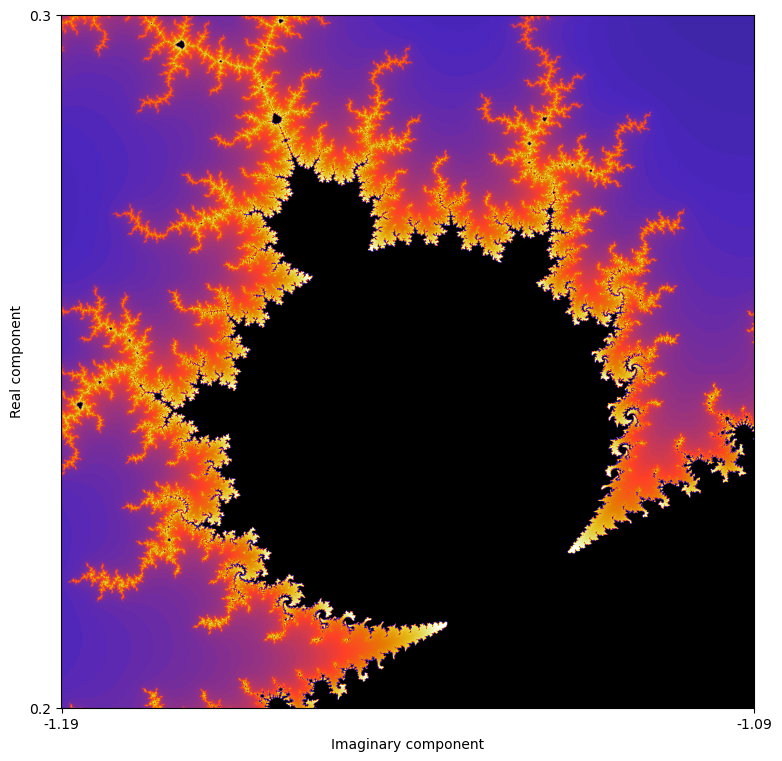

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
plt.xticks(
    ticks=[0, times_esc.shape[1] - 1],
    labels=[round(c.real.min(), n_dec), round(c.real.max(), n_dec)]
)
plt.yticks(
    ticks=[0, times_esc.shape[0] - 1],
    labels=[round(c.imag.max(), n_dec), round(c.imag.min(), n_dec)]
)
plt.xlabel("Imaginary component")
plt.ylabel("Real component")
plt.imshow(times_esc, cmap=cmap)

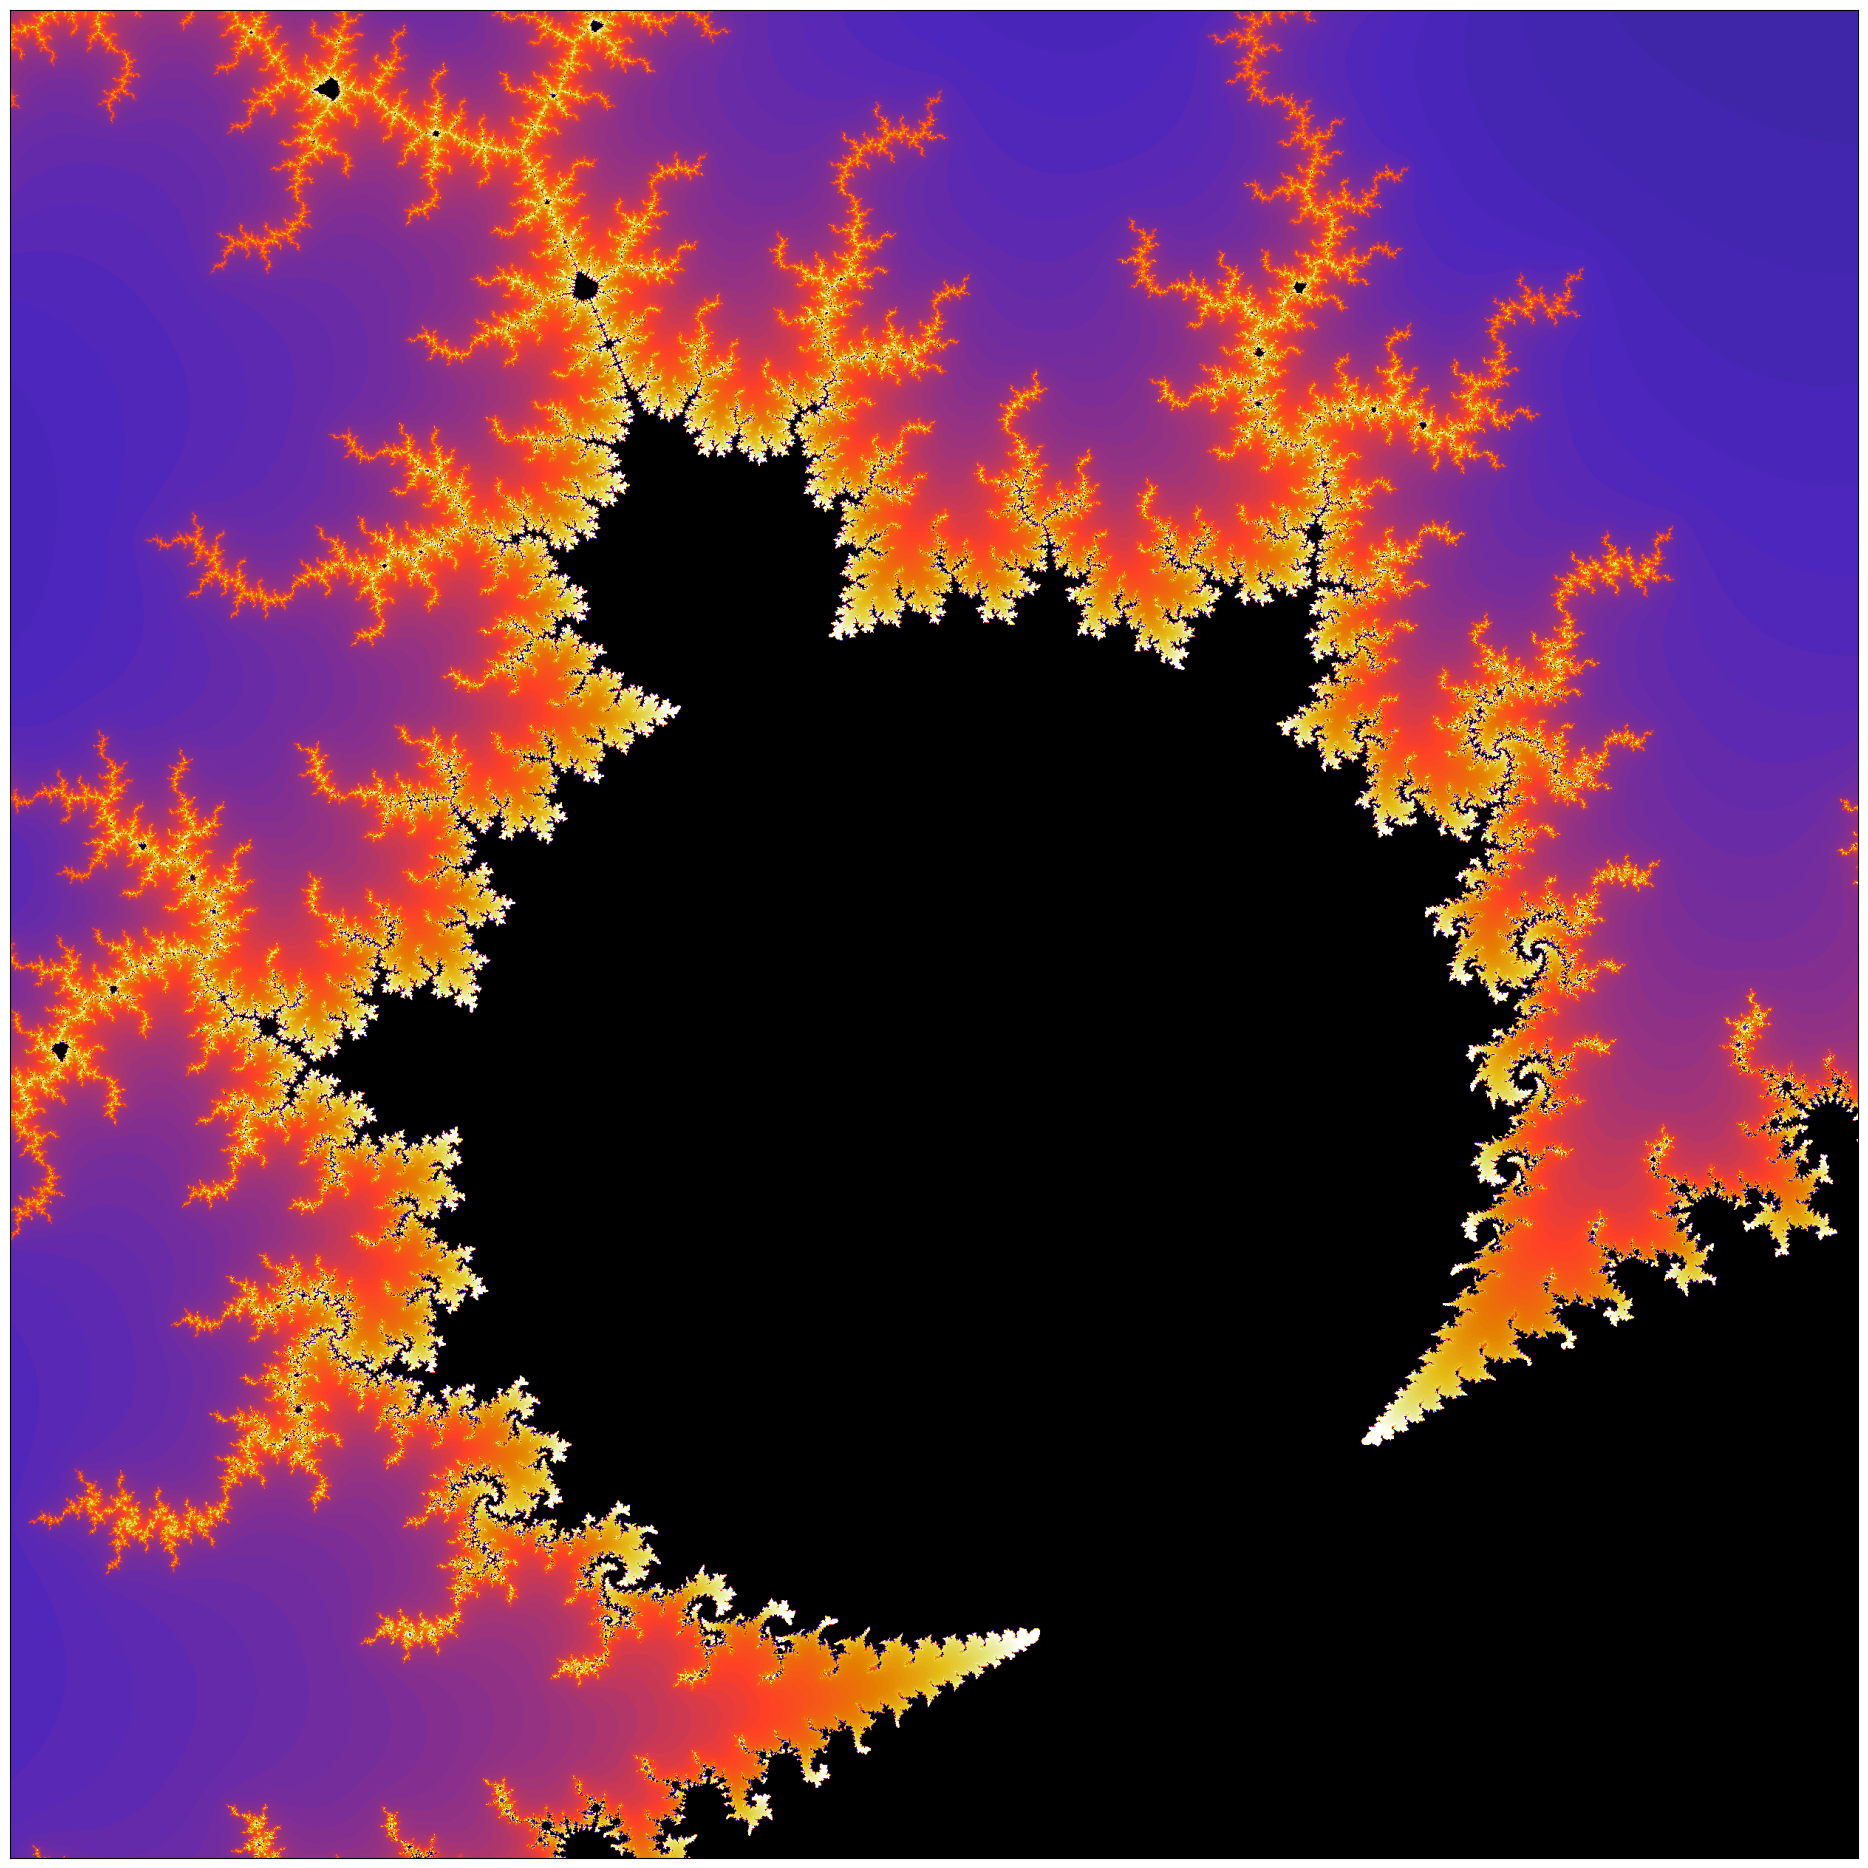

In [10]:
# save hi-res figure
fig, ax = plt.subplots(1, 1, figsize=(24, 24))
plt.xticks(ticks=[], label=[])
plt.yticks(ticks=[], label=[])
plt.imshow(times_esc, cmap=cmap)
plt.savefig('mandelbrot.png', bbox_inches='tight', pad_inches=0)